Importation des bibliothèques nécessaires

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import itertools
import numpy as np

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random(x):
  test = []
  for _ in range(x):
    random_number = random.randint(1, 60) # genere des nums entre 1 et 60
    test.append(random_number)
  return test

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random_client(x):
    test = []
    while len(test) < x:
        random_number = random.randint(1, 60)
        if random_number not in test:
            test.append(random_number)
    return test

Fonction pour générer la population avec un taille donnée

In [ ]:
def generate_population(clients, population_size):
    population = []
    for _ in range(population_size):
        random.shuffle(clients)  # Mélange aléatoire des coordonnées des clients
        population.append(list(clients))  # Ajout d'un individu à la population
    return population

Fonction pour calculer la distance entre paires de clients

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

Fonction pour calculer la matrice de distance entre les clients

In [ ]:
def calculate_distance_matrix(client_coordinates):
    num_clients = len(client_coordinates)
    distance_matrix = [[0] * num_clients for _ in range(num_clients)]

    for i in range(num_clients):
        for j in range(num_clients):
            if i != j:
                x1, y1 = client_coordinates[i]
                x2, y2 = client_coordinates[j]
                distance = calculate_distance(x1, y1, x2, y2)
                distance_matrix[i][j] = distance

    return distance_matrix

Fonction pour calculer la matrice de distance de la consommation d'énergie

In [ ]:
def calculate_energy_consumption(speed, consumption_rate, distance_matrix):
    energy_matrix = []

    for i in range(len(distance_matrix)):
        energy_row = [distance * consumption_rate / speed for distance in distance_matrix[i]]
        energy_matrix.append(energy_row)

    return energy_matrix


Evaluation de la population

In [ ]:
def evaluate_population(client_coordinates, speed, consumption_rate, population):
    distances = []
    energies = []
    fitness_scores = []

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    for individual in population:

        energy = sum(energy_matrix[i][j] for i, j in zip(individual[:-1], individual[1:]))
        fitness_score = 1/(energy)
        energies.append(energy)
        fitness_scores.append(fitness_score)

    return  energies, fitness_scores

Evaluation de chaque individu (fitness score)

In [ ]:
def evaluate_fitness(individual, client_coordinates, speed, consumption_rate):

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)


    energy = sum(energy_matrix[individual[i]][individual[i+1]] for i in range(len(individual) - 1))

    # Fitness score is a combination of distance and energy
    fitness_score = 1/(energy)

    return fitness_score


Séléctionner les parents

In [ ]:

def select_parents(population, num_parents):
    parents = random.sample(population, num_parents)
    return parents

croisement des meilleurs parents pour générer les child (croisement par ordre)

In [ ]:
import time
import random

def order_crossover(parents, crossover_rate):
    """
    Performs Order Crossover (OX) on a pair of parent solutions.

    Args:
      parents: A tuple containing two parent solutions.
      crossover_rate: The probability of crossover occurring.

    Returns:
      A tuple containing two offspring solutions.
    """
    start_time = time.time()
    parent1, parent2 = parents

    # Check if crossover should occur based on crossover_rate
    if random.random() > crossover_rate:
        return parent1, parent2

    # Choose two cut points randomly.
    cut_point1, cut_point2 = sorted(random.sample(range(len(parent1)), 2))

    # Copy the middle segment from the first parent to the offspring.
    offspring1 = parent1[cut_point1:cut_point2]
    offspring2 = parent2[cut_point1:cut_point2]

    # Fill the remaining positions in the offspring with genes from the second parent.
    for i in range(len(parent1)):
        if cut_point1 <= i < cut_point2:
            continue
        gene = parent2[i]
        while gene in offspring1:
            gene = parent2[parent1.index(gene)]
        offspring1.append(gene)

    # Repeat for the second offspring.
    for i in range(len(parent1)):
        if cut_point1 <= i < cut_point2:
            continue
        gene = parent1[i]
        while gene in offspring2:
            gene = parent1[parent2.index(gene)]
        offspring2.append(gene)

    end_time = time.time()
    execution_time = (end_time - start_time) * 1000  # Convertir en millisecondes
    print("Temps d'exécution de order crossover:", execution_time, "millisecondes")
    return offspring1, offspring2


Fonction de mutation qui permet de changer les position des gènes trouver dans child de manière aléatoire

In [ ]:
def mutation(children, mutation_rate):
    mutated_children = []

    for child in children:
        if random.random() <= mutation_rate:
            mutated_child = list(child)  # Convertir en une liste modifiable

            # Générer deux positions de gènes uniques
            gene_pos1, gene_pos2 = random.sample(range(len(child)), 2)

            # Échanger les positions des gènes
            mutated_child[gene_pos1], mutated_child[gene_pos2] = mutated_child[gene_pos2], mutated_child[gene_pos1]

            mutated_children.append(mutated_child)
        else:
            mutated_children.append(child)

    return mutated_children

Données (paramètres d'entrées)

In [ ]:
clients = generate_random_client(60) # les indices des clients
population_size = 50 # taille de la population
client_coordinates = {0: (0, 0), 1: (73, 68), 2: (89, 96), 3: (56, 98),  4: (69, 14), 5: (60, 98), 6: (93, 58), 7: (76, 72), 8: (18, 17),  9: (4, 70), 10: (24, 37),  11: (32, 56), 12: (38, 13), 13: (53, 96), 14: (77, 26), 15: (27, 14), 16: (79, 60), 17: (6, 14), 18: (37, 28), 19: (32, 73),  20: (91, 63), 21: (36, 22), 22: (32, 59),  23: (21, 32),  24: (38, 98), 25: (4, 43), 26: (44, 28), 27: (36, 61), 28: (63, 1), 29: (96, 22), 30: (19, 76),  31: (73, 78), 32: (51, 27), 33: (44, 95), 34: (83, 54),   35: (21, 47), 36: (23, 27), 37: (65, 13), 38: (86, 42), 39: (94, 80), 40: (100, 86), 41: (35, 49), 42: (65, 23),   43: (9, 77), 44: (57, 20), 45: (82, 49),  46: (18, 41), 47: (98, 49),  48: (78, 48), 49: (28, 14),  50: (12, 19),  51: (28, 95), 52: (87, 53), 53: (26, 6),  54: (46, 79), 55: (30, 38), 56: (85, 77),  57: (18, 74),  58: (30, 96), 59: (6, 14), 60: (18, 92)}
demands = [1, 50, 45, 18, 2, 5, 38, 2, 16, 7, 25, 19, 10, 9, 8, 16, 1, 5, 26, 6, 49, 25, 18, 4, 3, 8, 1, 44, 5, 17, 4, 37, 4, 5, 2, 3, 9, 44, 6, 55, 10, 33, 6, 50, 6, 31, 60, 12, 32, 28, 15, 16, 7, 53, 5, 41, 32, 39, 30, 23] # les demandes des clients
capacity = (2/3) * sum (demands) # capacité maximale
k = 8
num_parents = 2 # nombre de parents choisi
crossover_rate = 0.8 # taux de croisement
mutation_rate = 0.2 # taux de mutation
num_generations = 100 # nombre de génération
speed = 80 # vitesse
consumption_rate = 0.1  # consommation spécifique en kWh/km

In [ ]:
population = generate_population(clients, population_size)
# Afficher chaque individu
for individual in population:
    print(individual)

distance_matrix = calculate_distance_matrix(client_coordinates)
for row in distance_matrix:
  print(row)

energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)
for row in energy_matrix:
  print(row)

energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

for i in range(len(population)):
    print(f"Individu {i+1} -  Consommation d'énergie : {energies[i]}, Fitness Score : {fitness_scores[i]}")

parents = select_parents(population, num_parents)
for parent in parents:
    print("Parent:", parent )

children  = order_crossover(parents, crossover_rate)
for child in children:
    print("child:", child)

mutated_children = mutation(children, mutation_rate)
for child_mutate in mutated_children:
  print("child mutate:", child_mutate)

[8, 60, 36, 55, 57, 48, 28, 34, 13, 25, 3, 16, 9, 1, 54, 11, 15, 43, 4, 23, 7, 29, 50, 58, 26, 27, 59, 18, 39, 22, 51, 42, 24, 56, 10, 31, 33, 12, 14, 20, 6, 17, 5, 40, 47, 38, 19, 44, 49, 52, 41, 37, 53, 45, 30, 35, 21, 46, 32, 2]
[40, 7, 56, 9, 58, 32, 43, 19, 42, 46, 31, 41, 16, 27, 4, 38, 10, 39, 11, 36, 52, 14, 29, 37, 5, 35, 12, 33, 18, 3, 47, 50, 24, 2, 21, 8, 57, 45, 17, 53, 25, 59, 20, 44, 28, 13, 23, 30, 51, 49, 15, 54, 26, 55, 22, 60, 34, 6, 48, 1]
[15, 34, 59, 33, 54, 60, 16, 49, 56, 26, 50, 57, 55, 58, 39, 11, 52, 28, 3, 41, 18, 4, 30, 5, 45, 32, 21, 2, 8, 46, 47, 37, 29, 6, 17, 12, 14, 25, 53, 36, 43, 13, 27, 19, 22, 35, 40, 24, 51, 23, 42, 7, 20, 10, 38, 9, 44, 31, 48, 1]
[15, 54, 39, 30, 40, 37, 33, 19, 52, 32, 25, 47, 4, 22, 50, 29, 59, 26, 2, 18, 11, 27, 36, 60, 49, 3, 24, 57, 44, 46, 10, 31, 9, 45, 58, 56, 23, 38, 51, 13, 5, 16, 42, 7, 28, 12, 34, 1, 6, 55, 8, 14, 20, 21, 41, 53, 43, 17, 48, 35]
[40, 55, 26, 50, 46, 38, 18, 44, 25, 48, 56, 22, 35, 47, 59, 11, 54, 57,

Exécution de l'algorithme génétique (trouver le meilleur individu avec leur score  )

In [ ]:
import random

def execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations,  speed, consumption_rate):


    # Générer la population initiale
    population = generate_population(clients, population_size)

    # Calculer la matrice des distances
    distance_matrix = calculate_distance_matrix(client_coordinates)

    # Calculer la matrice de consommation d'énergie
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    # Boucle sur le nombre de générations
    for generation in range(num_generations):
        # Évaluer la population
        energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

        # Sélectionner les parents
        parents = select_parents(population, num_parents)

        # Effectuer le croisement
        children = order_crossover(parents, crossover_rate)

        # Effectuer la mutation
        mutated_children = mutation(children, mutation_rate)

        # Remplacer la population par les enfants mutés
        population = mutated_children

    # Évaluer la population finale
    energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

    # Trouver l'indice de l'individu avec le score de fitness minimum parmi les enfants mutés
    best_index = fitness_scores.index(min(fitness_scores))

    # Renvoyer le meilleur individu parmi les enfants mutés
    return population[best_index]



Affichage du meilleur individu

In [ ]:

best_individual = execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations,  speed, consumption_rate)
print("Meilleur individu:", best_individual)


Temps d'exécution de order crossover: 0.09679794311523438 millisecondes
Temps d'exécution de order crossover: 0.07343292236328125 millisecondes
Temps d'exécution de order crossover: 0.09799003601074219 millisecondes
Temps d'exécution de order crossover: 0.0782012939453125 millisecondes
Temps d'exécution de order crossover: 0.1347064971923828 millisecondes
Temps d'exécution de order crossover: 0.09202957153320312 millisecondes
Temps d'exécution de order crossover: 0.10371208190917969 millisecondes
Temps d'exécution de order crossover: 0.09393692016601562 millisecondes
Temps d'exécution de order crossover: 0.08058547973632812 millisecondes
Temps d'exécution de order crossover: 0.07581710815429688 millisecondes
Temps d'exécution de order crossover: 0.08797645568847656 millisecondes
Temps d'exécution de order crossover: 0.07843971252441406 millisecondes
Temps d'exécution de order crossover: 0.07748603820800781 millisecondes
Temps d'exécution de order crossover: 0.08416175842285156 millisec

Fonction de découdage du meilleur individu retourner par l'algorithme génétique et qui donne les routes avec leur distance, leur consommation d'enrgie

In [ ]:
def decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k):
    routes = []
    current_route = [0]  # Commence chaque route par le dépôt
    current_demand = 0
    current_distance = 0
    current_energy_consumption = 0

    # Initialise la liste des clients non visités
    unvisited_clients = set(best_individual)

    # Parcours les clients du meilleur individu dans l'ordre
    for client in best_individual:
        # Si le client est déjà visité ou s'il s'agit du dépôt, passe au suivant
        if client == 0 or client not in unvisited_clients:
            continue

        # Si ajouter le client ne viole pas les contraintes
        if current_demand + demands[client - 1] <= capacity and len(current_route) <= k + 1:
            current_route.append(client)
            current_demand += demands[client - 1]
            current_distance += distance_matrix[current_route[-2]][client]
            current_energy_consumption += energy_matrix[current_route[-2]][client]
            unvisited_clients.remove(client)
        else:
            # Termine la route actuelle et démarre une nouvelle route
            current_route.append(0)  # Termine la route actuelle par le dépôt
            current_distance += distance_matrix[current_route[-2]][0]
            current_energy_consumption += energy_matrix[current_route[-2]][0]
            routes.append((current_route, current_distance, current_energy_consumption))
            current_route = [0, client]  # Démarre une nouvelle route avec le dépôt et le client
            current_demand = demands[client - 1]
            current_distance = distance_matrix[0][client]
            current_energy_consumption = energy_matrix[0][client]
            unvisited_clients.remove(client)

    # Termine la dernière route
    current_route.append(0)  # Termine la dernière route par le dépôt
    current_distance += distance_matrix[current_route[-2]][0]
    current_energy_consumption += energy_matrix[current_route[-2]][0]
    routes.append((current_route, current_distance, current_energy_consumption))

    return routes

Affichage des routes

In [ ]:
routes = decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k)
total_distance = 0
total_energy_consumption = 0

for route, distance, energy_consumption in routes:
    print("Route:", route)
    print("Distance:", distance)
    print("Energy Consumption:", energy_consumption)
    print()

    total_distance += distance
    total_energy_consumption += energy_consumption

print("Total Distance:", total_distance)
print("Total Energy Consumption:", total_energy_consumption)

Route: [0, 17, 38, 60, 21, 31, 55, 42, 15, 27, 0]
Distance: 578.3333888468405
Energy Consumption: 0.7229167360585507

Route: [0, 59, 14, 41, 13, 35, 58, 33, 46, 24, 0]
Distance: 533.2812474997554
Energy Consumption: 0.6666015593746943

Route: [0, 25, 5, 1, 6, 37, 40, 26, 16, 44, 0]
Distance: 544.79470976443
Energy Consumption: 0.6809933872055375

Route: [0, 11, 20, 9, 36, 56, 2, 49, 47, 7, 0]
Distance: 674.2502174730953
Energy Consumption: 0.8428127718413692

Route: [0, 34, 50, 53, 3, 28, 8, 48, 23, 12, 0]
Distance: 631.4585564522588
Energy Consumption: 0.7893231955653237

Route: [0, 18, 4, 10, 29, 39, 52, 45, 19, 22, 0]
Distance: 434.3231919196181
Energy Consumption: 0.5429039898995226

Route: [0, 30, 54, 32, 51, 43, 57, 0]
Distance: 341.34646196270523
Energy Consumption: 0.42668307745338147

Total Distance: 3737.7877739187034
Total Energy Consumption: 4.6722347173983785


plot des routes

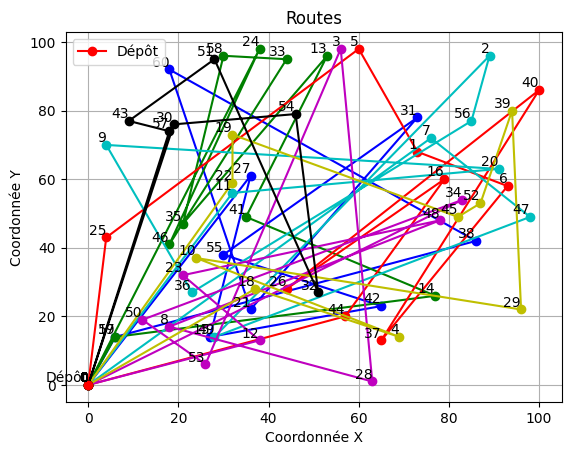

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(routes, distance_matrix):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Liste de couleurs prédéfinies

    for i, (route, _, _) in enumerate(routes):
        x_coords = []
        y_coords = []
        for client in route[:]:
            x = client_coordinates[client][0]
            y = client_coordinates[client][1]
            x_coords.append(x)
            y_coords.append(y)
            plt.plot(x, y, marker='o', color=colors[i % len(colors)])  # Attribution de la couleur

            plt.text(x, y, str(client), verticalalignment='bottom', horizontalalignment='right')

        plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], color=colors[i % len(colors)])

    # Affichage du dépôt
    depot_x = client_coordinates[0][0]
    depot_y = client_coordinates[0][1]
    plt.plot(depot_x, depot_y, marker='o', color='red', label='Dépôt')
    plt.text(depot_x, depot_y, 'Dépôt', verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.title('Routes')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_routes(routes, distance_matrix)
